In [109]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [110]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def ex_datos(nombre):
    df = pd.read_csv(nombre,sep="\s+", header = None, names = ["Cores","Tiempo"])
    return df

def tab_promedios(lista_proms,nombres):
    pd.set_option("display.precision", 8) 
    proms = [np.array(list(i.groupby("Cores")["Tiempo"].mean())) for i in lista_proms]
    print(zip(*proms))
    return pd.DataFrame(list(zip(*proms)), columns=nombres,index=[1,2,4,8,16,20])

def tab_speedup(promedios,nombres):
    speedups = [(list(promedios[i])[0])/np.array(list(promedios[i])) for i in promedios]
    return pd.DataFrame(list(zip(*speedups)), columns=nombres,index=[1,2,4,8,16,20])

def tab_eficiencia(speedups,nombres,x):
    efi = [np.array(list(speedups[i]))/x for i in speedups]
    return pd.DataFrame(list(zip(*efi)), columns=nombres,index=[1,2,4,8,16,20])

def graficas(tab,x,y_label,titulo,l):
    colores = ["b","r","g","y"]
    j = 0
    plt.figure(figsize=(6,4))
    for i in tab:
        plt.plot(x,tab[i],"o"+colores[j]+"--",label = i)
        j = j + 1
    plt.xlabel('Cores')
    plt.ylabel(y_label)
    plt.title(titulo)
    plt.xticks(x)

    plt.legend()
    if l == 1:
        plt.axhline(y=0.5, color="g", linestyle="--")
        plt.grid(axis="y")

    
    

    


<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\josem\AppData\Local\Temp\ipykernel_5932\3877704646.py:6: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(nombre,sep="\s+", header = None, names = ["Cores","Tiempo"])


In [111]:
nombres = ["Heat OpenMP", "Heat MKL"] # Nombres de las columanas que iran en cada tabla
archivos = ["Tiempos_heat.txt","Tiemplo_MKL.txt"] # Nombres de los archivos
x = np.array([1,2,4,8,16,20]) # Número de cores
datos = [ex_datos(i) for i in archivos] # Se extraen los datos desde los archivo .txt
datos[0]


,Cores,Tiempo
0,1,1.000000
1,1,0.453222
2,1,0.453489
3,1,0.453793
4,2,0.340639
5,2,0.343953
6,2,0.343051
7,4,0.286476
8,4,0.286360
9,4,0.287565


In [112]:
# Tabla de promedio bases de cada método
tabla_promedios = tab_promedios(datos,nombres)
tabla_promedios

,Heat OpenMP,Heat MKL
1,0.59012600,0.13420033
2,0.34254767,0.06783467
4,0.28680033,0.03645200
8,0.26024867,0.02101567
16,0.24400567,0.01192967
20,0.24087467,0.02139133


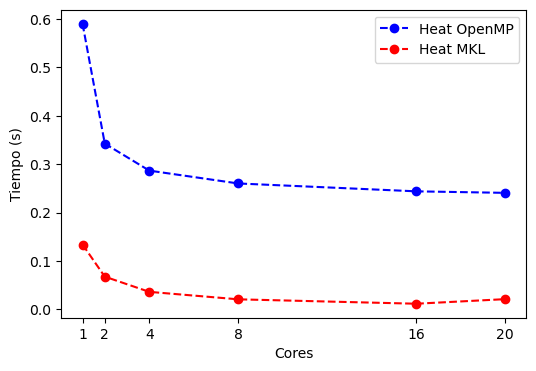

In [113]:
graficas(tabla_promedios,x,"Tiempo (s)","",0)

In [114]:
# Tabla de speedup de cada método
tabla_speedup = tab_speedup(tabla_promedios,nombres)
tabla_speedup

,Heat OpenMP,Heat MKL
1,1.00000000,1.00000000
2,1.72275586,1.97834441
4,2.05761964,3.68156297
8,2.26754668,6.38572811
16,2.41849301,11.24929448
20,2.44992970,6.27358432


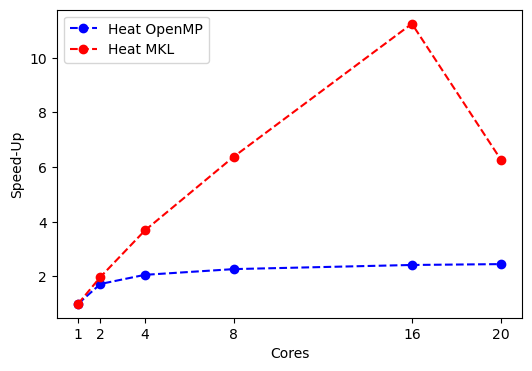

In [115]:
graficas(tabla_speedup,x,"Speed-Up","",0)

In [116]:
# Tabla de eficiencia para cada método
tabla_eficiencia = tab_eficiencia(tabla_speedup,nombres,x)
tabla_eficiencia

,Heat OpenMP,Heat MKL
1,1.00000000,1.00000000
2,0.86137793,0.98917220
4,0.51440491,0.92039074
8,0.28344333,0.79821601
16,0.15115581,0.70308090
20,0.12249649,0.31367922


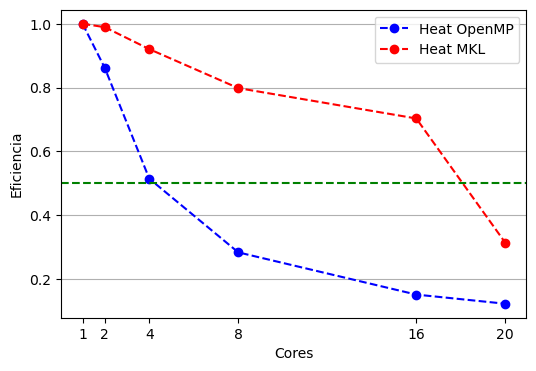

In [117]:
graficas(tabla_eficiencia,x,"Eficiencia","",1)